# Part 1

In [1]:
PART1_PATH = "output/part1/"

Save a picture of yourself on your computer.

In [2]:
import cv2
import os


image_path = "Images/me.jpg"
image = cv2.imread(image_path)

Save the image loaded in the software in three ways: binary, gray color again in a folder.

In [3]:
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(grayscale_image, 127, 255, cv2.THRESH_BINARY)
colored_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Save the images
cv2.imwrite(PART1_PATH + 'binary_image.jpg', binary_image)
cv2.imwrite(PART1_PATH + 'grayscale_image.jpg', grayscale_image)
cv2.imwrite(PART1_PATH + 'colored_image.jpg', cv2.cvtColor(colored_image, cv2.COLOR_RGB2BGR))

True

Increase and decrease the contrast of your gray and color image once and the output image of each
save.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def adjust_contrast(image, upper_coefs, lower_coefs, file_name):
    image_copy = np.copy(image)
    median_value = np.median(image_copy)

    upper_mask = image_copy >= median_value
    image_copy[upper_mask] = np.clip(upper_coefs[1] * image_copy[upper_mask] + upper_coefs[0], 0, 255)

    lower_mask = image_copy < median_value
    image_copy[lower_mask] = np.clip(lower_coefs[1] * image_copy[lower_mask] + lower_coefs[0], 0, 255)

    if image.ndim == 3 and image.shape[2] == 3:
        cv2.imwrite(f"{PART1_PATH}/{file_name}.jpg", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    else:
        cv2.imwrite(f"{PART1_PATH}/{file_name}.jpg", image)

    return image_copy

def display_image(image, title):
    if image.ndim == 3 and image.shape[2] == 3:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

def process_images(image, scale):
    upper_coef = (11, 1.2)
    lower_coef = (-11, 0.8)
    high_adjusted_image = adjust_contrast(image, upper_coef, lower_coef, f'high_adjusted_{scale}_image')

    upper_coef = (-11, 1)
    lower_coef = (11, 1)
    low_adjusted_image = adjust_contrast(image, upper_coef, lower_coef, f'low_adjusted_{scale}_image')

    display_image(image, f'Original {scale} image')
    display_image(high_adjusted_image, f'High contrast {scale} image')
    display_image(low_adjusted_image, f'Low contrast {scale} image')



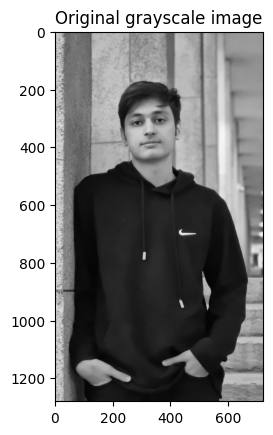

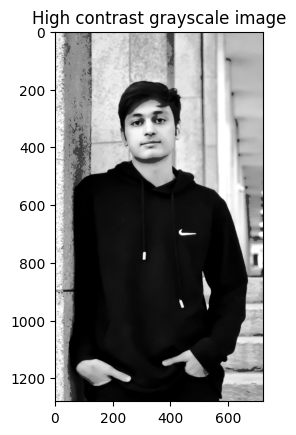

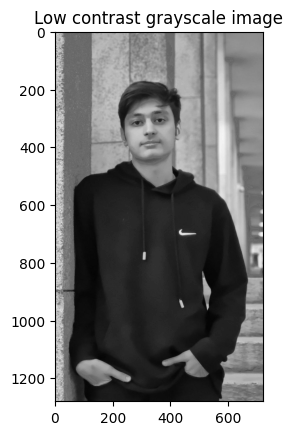

In [5]:
process_images(grayscale_image, 'grayscale')

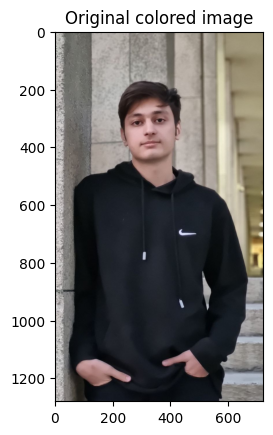

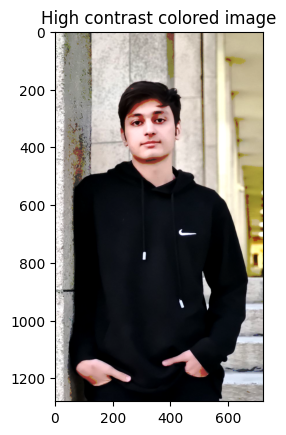

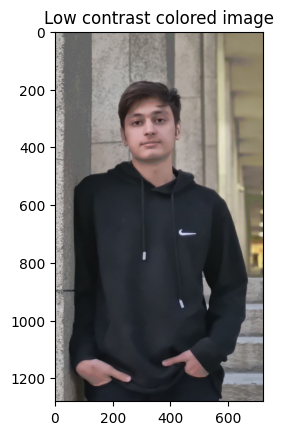

In [6]:
process_images(colored_image, 'colored')

Increase all the gray values ​​of the image by 20 units and save the image

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def adjust_pixel_values(image, adjustment):
    adjusted_copy = np.copy(image)
    adjusted_copy = np.clip(adjusted_copy + adjustment, 0, 255)
    cv2.imwrite(PART1_PATH + f'increased_image_by_{adjustment}.jpg', adjusted_copy)
    return adjusted_copy

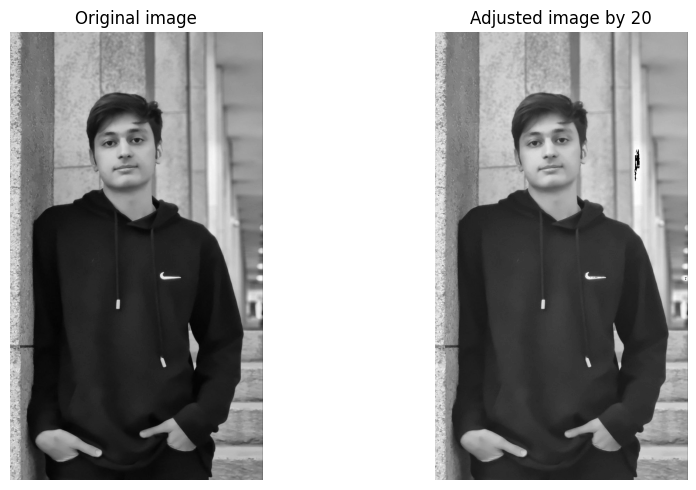

In [8]:
adjustment_value = 20
adjusted_image = adjust_pixel_values(grayscale_image, adjustment_value)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].set_title('Original image')
axes[0].imshow(grayscale_image, cmap='gray')
axes[0].axis('off')
axes[1].set_title(f'Adjusted image by {adjustment_value}')
axes[1].imshow(adjusted_image, cmap='gray')
axes[1].axis('off')
plt.tight_layout()
plt.show()


Apply salt and pepper noise to your original image and save the output noise image.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

def apply_salt_and_pepper_noise(image, salt_chance, pepper_chance): 
    image_copy = np.copy(image)
    row , col = image_copy.shape 
    
    salt_amount = int(salt_chance * image_copy.size)
    for _ in range(salt_amount): 
        y_coord = random.randint(0, row - 1) 
        x_coord = random.randint(0, col - 1) 
        image_copy[y_coord][x_coord] = 255
        
    pepper_amount = int(pepper_chance * image_copy.size)
    for _ in range(pepper_amount): 
        y_coord = random.randint(0, row - 1) 
        x_coord = random.randint(0, col - 1) 
        image_copy[y_coord][x_coord] = 0
    
    image_copy = np.clip(image_copy, 0, 255)
    cv2.imwrite(PART1_PATH + 'salt_and_pepper_noisy_image.jpg', image_copy)
    return image_copy


In [10]:
with_salt_and_pepper_image = apply_salt_and_pepper_noise(grayscale_image, 0.25, 0.25)

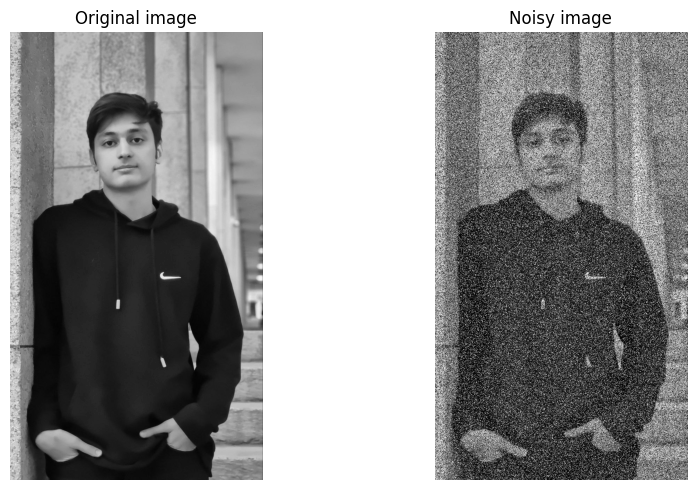

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_title('Original image')
axes[0].imshow(grayscale_image, cmap='gray')
axes[0].axis('off')

axes[1].set_title('Noisy image')
axes[1].imshow(with_salt_and_pepper_image, cmap='gray')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Reduce the noise of the image with the help of the median filter and save the resulting output.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def apply_median_filter(input_image, kernel):
    rows, cols = input_image.shape

    padding = kernel // 2

    output_image = np.copy(input_image)

    for i in range(padding, rows - padding):
        for j in range(padding, cols - padding):
            neighborhood = input_image[i - padding:i + padding + 1, j - padding:j + padding + 1]

            output_image[i, j] = np.median(neighborhood)
    
    cv2.imwrite(PART1_PATH + 'applied_median_filter_image.jpg', output_image)
    return output_image

In [13]:
kernel = 5
applied_median_filter_image = apply_median_filter(with_salt_and_pepper_image, kernel)

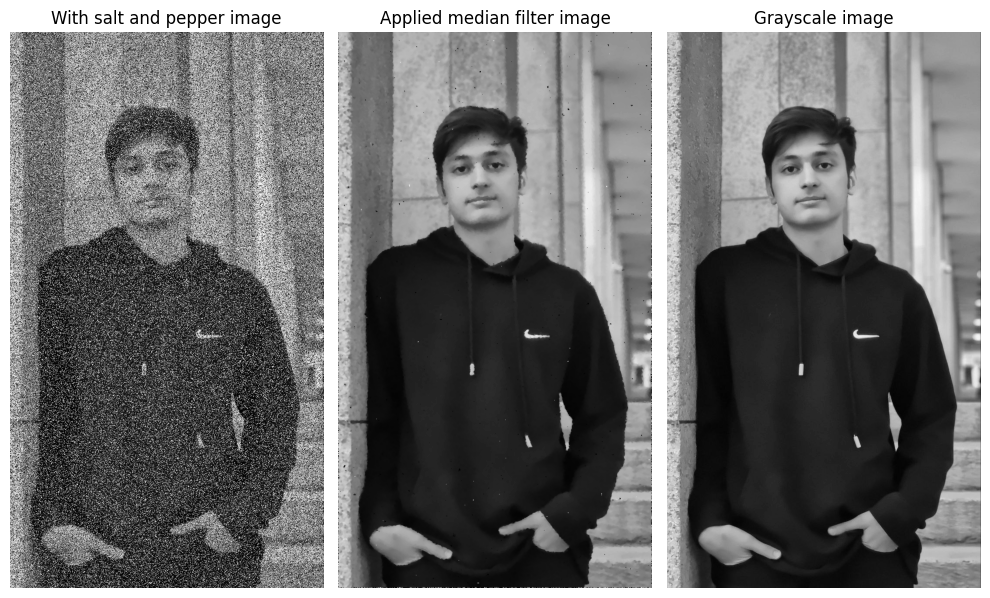

In [14]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.title('With salt and pepper image')
plt.imshow(with_salt_and_pepper_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Applied median filter image')
plt.imshow(applied_median_filter_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Grayscale image')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


With the help of Sobel, Canny operators for edge detection, extract the edges of your original image and save these edge-detected images.

In [15]:
import cv2
import matplotlib.pyplot as plt

def detect_edges(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    canny_edges = cv2.Canny(image, 50, 150)  # Low and high thresholds
    return sobel_x, sobel_y, sobel_combined, canny_edges

In [16]:
sobel_x, sobel_y, sobel_combined, canny_edges = detect_edges(grayscale_image)

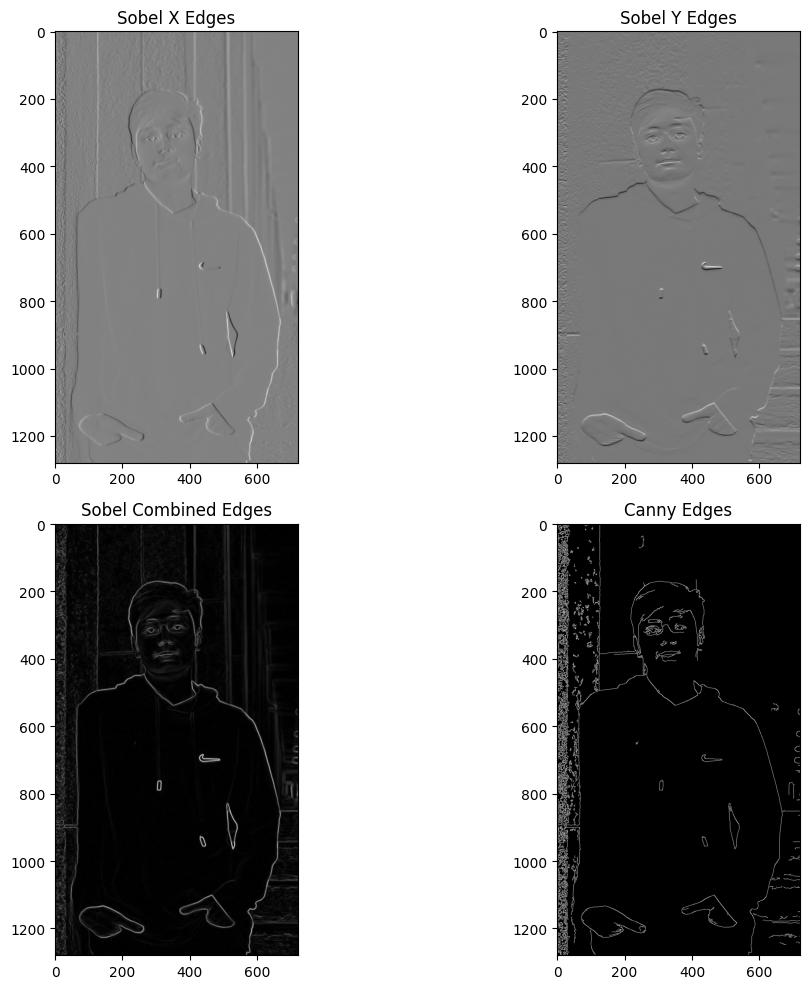

In [17]:
cv2.imwrite(PART1_PATH + 'sobel_x_edges.jpg', sobel_x)
cv2.imwrite(PART1_PATH + 'sobel_y_edges.jpg', sobel_y)
cv2.imwrite(PART1_PATH + 'sobel_combined_edges.jpg', sobel_combined)
cv2.imwrite(PART1_PATH + 'canny_edges.jpg', canny_edges)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.title('Sobel X Edges')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Sobel Y Edges')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Sobel Combined Edges')
plt.imshow(sobel_combined, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Canny Edges')
plt.imshow(canny_edges, cmap='gray')

plt.tight_layout()
plt.show()

With the help of a suitable operator for sharpening operation, sharpen the original image and save it.

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_enhancement_filter(image, kernel):
    enhanced_image = cv2.filter2D(image, -1, kernel)
    return enhanced_image


In [19]:
enhancement_kernel = np.array([[-1, -1, -1],
                               [-1, 9, -1],
                               [-1, -1, -1]])

enhanced_image = apply_enhancement_filter(colored_image, enhancement_kernel)

cv2.imwrite(PART1_PATH + 'enhanced_image.jpg', cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))


True

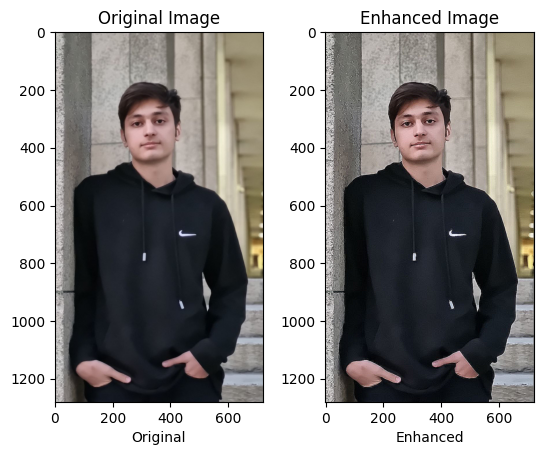

In [20]:
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(colored_image)
plt.xlabel('Original')

plt.subplot(1, 2, 2)
plt.title('Enhanced Image')
plt.imshow(enhanced_image)
plt.xlabel('Enhanced')

plt.show()

With the help of Average and Gaussian operators to blur the image, blur your original image and save these blurred images.

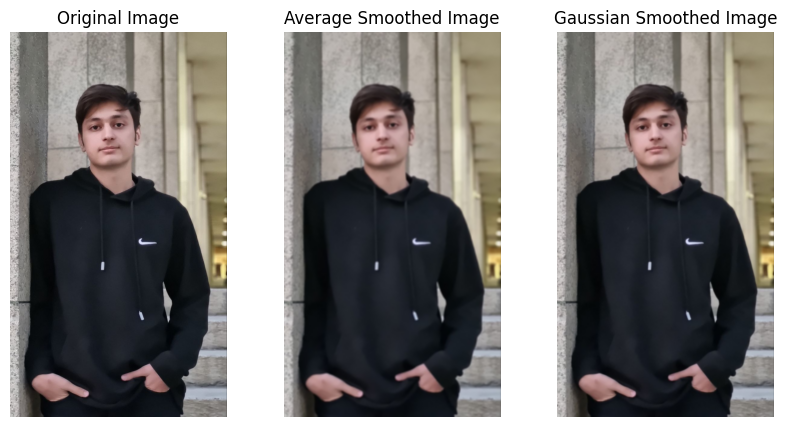

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_average_filter(image, kernel):
    kernel = np.ones((kernel, kernel), np.float32) / (kernel * kernel)
    filtered_image = cv2.filter2D(image, -1, kernel)
    cv2.imwrite(PART1_PATH + 'average_smoothed_image.jpg', cv2.cvtColor(filtered_image, cv2.COLOR_RGB2BGR))
    return filtered_image

def apply_gaussian_filter(image, kernel):
    gaussian_blurred = cv2.GaussianBlur(image, (kernel, kernel), 0)
    cv2.imwrite(PART1_PATH + 'gaussian_smoothed_image.jpg', cv2.cvtColor(gaussian_blurred, cv2.COLOR_RGB2BGR))
    return gaussian_blurred

kernel = 7
average_smoothed_image = apply_average_filter(colored_image, kernel)
gaussian_smoothed_image = apply_gaussian_filter(colored_image, kernel)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(colored_image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Average Smoothed Image')
plt.imshow(average_smoothed_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gaussian Smoothed Image')
plt.imshow(gaussian_smoothed_image)
plt.axis('off')

plt.show()


# Part 2

In [22]:
part2_path = 'output/part2'

Recall the image of yourself that you saved in the previous exercise.

In [23]:
import cv2
import os

image_path = "Images/me.jpg"  # Replace with the actual path of your image
image = cv2.imread(image_path)

Divide the image into its color components in 3 different color models (as desired) and save.

In [24]:
import os
import cv2
import matplotlib.pyplot as plt

def save_color_components(image, part_path):
    if not os.path.exists(part_path):
        os.makedirs(part_path)

    b, g, r = cv2.split(image)
    h, s, v = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
    y, cr, cb = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb))

    images = [
        ('RGB', '_blue.jpg', b),
        ('RGB', '_green.jpg', g),
        ('RGB', '_red.jpg', r),
        ('HSV', '_hue.jpg', h),
        ('HSV', '_saturation.jpg', s),
        ('HSV', '_value.jpg', v),
        ('YCbCr', '_Y.jpg', y),
        ('YCbCr', '_Cr.jpg', cr),
        ('YCbCr', '_Cb.jpg', cb)
    ]

    for prefix, suffix, image in images:
        cv2.imwrite(os.path.join(part_path, prefix + suffix), image)



In [25]:
save_color_components(image, part2_path)
print("Color components have been saved successfully.")

Color components have been saved successfully.


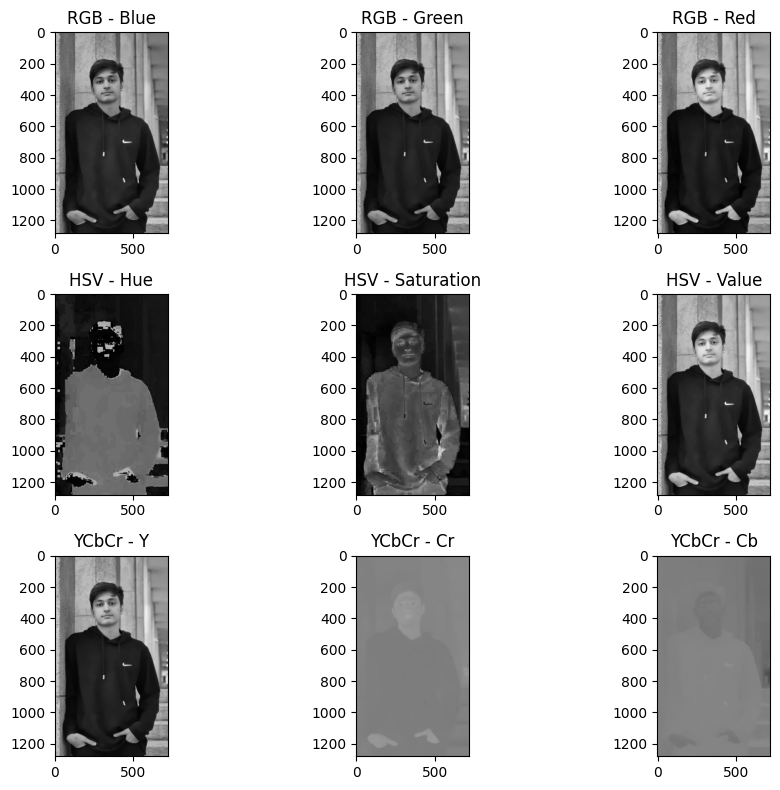

In [26]:

plt.figure(figsize=(10, 8))
for i, color_space in enumerate(['RGB', 'HSV', 'YCbCr']):
    for j, component in enumerate(['blue', 'green', 'red'] if color_space == 'RGB' else ['hue', 'saturation', 'value'] if color_space == 'HSV' else ['Y', 'Cr', 'Cb']):
        image_path = os.path.join(part2_path, f"{color_space}_{component}.jpg")
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        plt.subplot(3, 3, i*3 + j + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"{color_space} - {component.capitalize()}")

plt.tight_layout()
plt.show()

Apply all types of filters that you have learned in the lesson (with desired settings for each filter, of course, you must indicate the desired settings in the report) to your image and save the output images in separate folders with specific names and a brief report. Prepare the results from the analysis.

In [27]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

PART2_PATH = 'output/part2/filters/'
THRESHOLD_VALUE = 120

def apply_low_pass_filter(image_data, kernel):
    filtered_image = cv2.filter2D(image_data, -1, kernel)
    return filtered_image

def apply_high_pass_filter(image_data, kernel, threshold):
    filtered_image = cv2.filter2D(image_data, -1, kernel)
    thresholded_image = np.where(np.abs(filtered_image) > threshold, 255, 0).astype(np.uint8)
    return thresholded_image

image = cv2.imread('Images/me.jpg', cv2.IMREAD_GRAYSCALE)

# Digital filters
smooth_filters = {
    'gaussian_blur': np.array([[1, 2, 1],
                               [2, 4, 2],
                               [1, 2, 1]]) / 16,
    'box_blur': np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]]) / 9,
}

edge_filters = {
    'sobel_y': np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]]),
    'sobel_x': np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]]),
    'prewitt_y': np.array([[1, 1, 1],
                           [0, 0, 0],
                           [-1, -1, -1]]),
    'prewitt_x': np.array([[1, 0, -1],
                           [1, 0, -1],
                           [1, 0, -1]])
}

for name, kernel in smooth_filters.items():
    filtered_image = apply_low_pass_filter(image, kernel)
    cv2.imwrite(os.path.join(PART2_PATH, f'{name}_filtered.jpg'), filtered_image)
    print(f"Applied {name} filter and saved the image.")

for name, kernel in edge_filters.items():
    filtered_image = apply_high_pass_filter(image, kernel, THRESHOLD_VALUE)
    cv2.imwrite(os.path.join(PART2_PATH, f'{name}_filtered.jpg'), filtered_image)
    print(f"Applied {name} filter and saved the image.")

# Selection filters
kernel_size = 5

# Apply minimum filter
min_filtered_image = cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))

# Apply maximum filter
max_filtered_image = cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))

# Apply median filter
median_filtered_image = cv2.medianBlur(image, kernel_size)

cv2.imwrite(os.path.join(PART2_PATH, 'min_filtered_image.jpg'), min_filtered_image)
cv2.imwrite(os.path.join(PART2_PATH, 'max_filtered_image.jpg'), max_filtered_image)
cv2.imwrite(os.path.join(PART2_PATH, 'median_filtered_image.jpg'), median_filtered_image)

print("Applied selection filters and saved the images.")

Applied gaussian_blur filter and saved the image.
Applied box_blur filter and saved the image.
Applied sobel_y filter and saved the image.
Applied sobel_x filter and saved the image.
Applied prewitt_y filter and saved the image.
Applied prewitt_x filter and saved the image.
Applied selection filters and saved the images.


Plot the histogram of your image (once a gray image and once an RGB color image) and analyze the drawn histograms in terms of contrast.

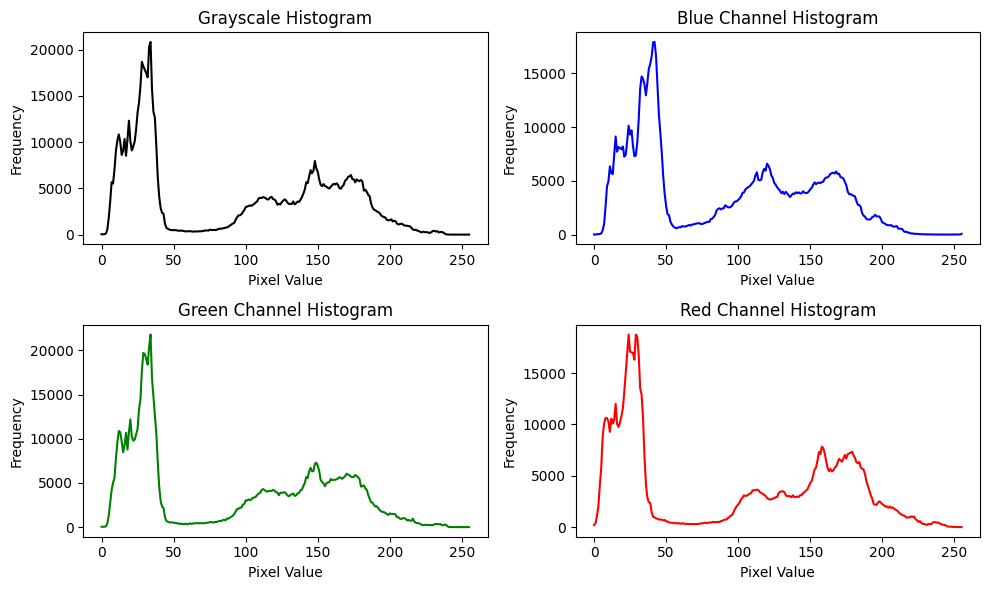

In [28]:
grayscale_image = cv2.imread('Images/me.jpg', cv2.IMREAD_GRAYSCALE)
colored_image = cv2.imread('Images/me.jpg', cv2.IMREAD_COLOR)

# Calculate histogram for grayscale image
histogram_gray = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])

# Calculate histogram for blue channel of color image
histogram_blue = cv2.calcHist([colored_image], [0], None, [256], [0, 256])

# Calculate histogram for green channel of color image
histogram_green = cv2.calcHist([colored_image], [1], None, [256], [0, 256])

# Calculate histogram for red channel of color image
histogram_red = cv2.calcHist([colored_image], [2], None, [256], [0, 256])

# Plot all histograms in a single figure
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(histogram_gray, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Grayscale Histogram')

plt.subplot(2, 2, 2)
plt.plot(histogram_blue, color='blue')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Blue Channel Histogram')

plt.subplot(2, 2, 3)
plt.plot(histogram_green, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Green Channel Histogram')

plt.subplot(2, 2, 4)
plt.plot(histogram_red, color='red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Red Channel Histogram')

plt.tight_layout()
plt.show()

Equalize and plot the histogram of your gray image.

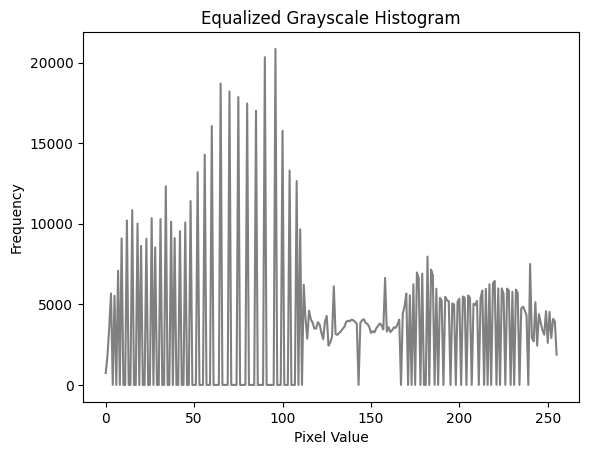

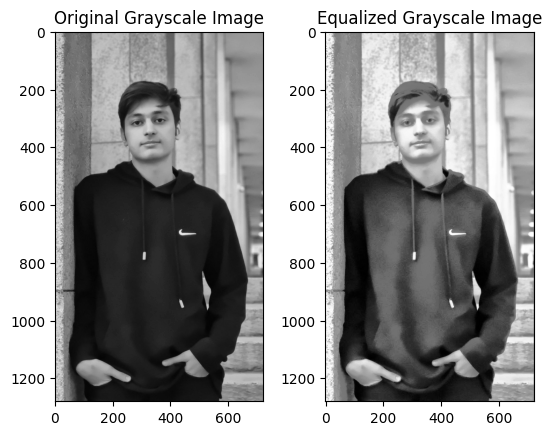

Histogram equalization and image plotting completed successfully.


In [29]:
import cv2
import matplotlib.pyplot as plt

PART2_PATH = 'output/part2/'

def plot_equalized_histogram(hist_data, title):
    plt.plot(hist_data, color='gray')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

equalized_image = cv2.equalizeHist(grayscale_image)
histogram_equalized_gray = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
cv2.imwrite(os.path.join(PART2_PATH, 'equalized.jpg'), filtered_image)

plot_equalized_histogram(histogram_equalized_gray, 'Equalized Grayscale Histogram')

plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(grayscale_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Equalized Grayscale Image')
plt.imshow(equalized_image, cmap='gray')

plt.show()

print("Histogram equalization and image plotting completed successfully.")


Plot the Fourier transform of your grayscale image.

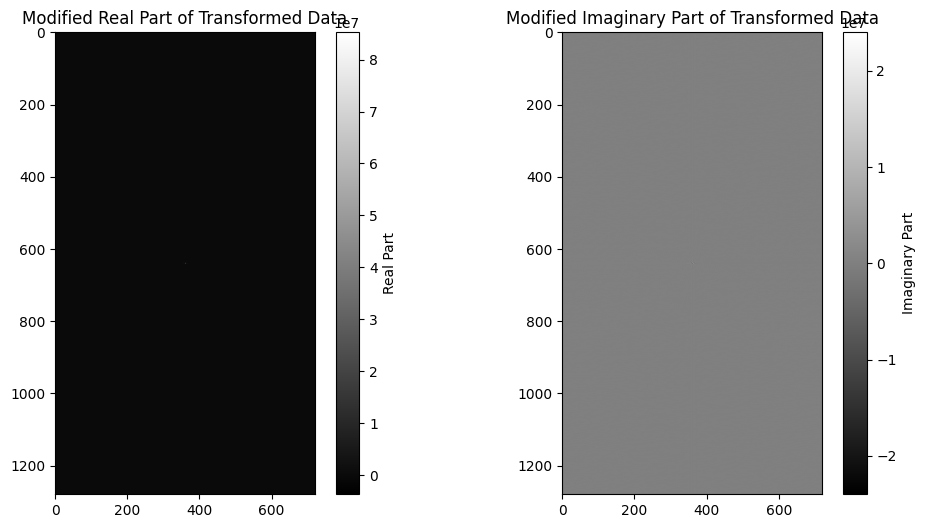

In [30]:
import numpy as np
import matplotlib.pyplot as plt

transformed_data = np.fft.fft2(grayscale_image)
shifted_transformed_data = np.fft.fftshift(transformed_data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.real(shifted_transformed_data), cmap='gray')
plt.colorbar(label='Real Part')
plt.title('Modified Real Part of Transformed Data')

plt.subplot(1, 2, 2)
plt.imshow(np.imag(shifted_transformed_data), cmap='gray')
plt.colorbar(label='Imaginary Part')
plt.title('Modified Imaginary Part of Transformed Data')

plt.show()


# Part 3

Analyze and check your original image (color), in terms of format, including header and bitstream - resolution - compressed or not - compression algorithm - compression type.

In [31]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

pic = Image.open('Images/me.jpg')
header_data = pic.info
width, height = pic.size

compression_info = pic.format_description
if compression_info:
   compression_state = "Compressed"
   compression_method = compression_info
else:
   compression_state = "Uncompressed"
   compression_method = "N/A"

# Print analysis results
print("Header Data:", header_data)
print("Resolution:", width, "x", height)
print("Compression State:", compression_state)
print("Compression Method:", compression_method)

Header Data: {'jfif': 257, 'jfif_version': (1, 1), 'dpi': (72, 72), 'jfif_unit': 1, 'jfif_density': (72, 72), 'progressive': 1, 'progression': 1, 'icc_profile': b'\x00\x00\x02\x18\x00\x00\x00\x00\x040\x00\x00mntrRGB XYZ \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\tdesc\x00\x00\x00\xf0\x00\x00\x00trXYZ\x00\x00\x01d\x00\x00\x00\x14gXYZ\x00\x00\x01x\x00\x00\x00\x14bXYZ\x00\x00\x01\x8c\x00\x00\x00\x14rTRC\x00\x00\x01\xa0\x00\x00\x00(gTRC\x00\x00\x01\xa0\x00\x00\x00(bTRC\x00\x00\x01\xa0\x00\x00\x00(wtpt\x00\x00\x01\xc8\x00\x00\x00\x14cprt\x00\x00\x01\xdc\x00\x00\x00<mluc\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x0cenUS\x00\x

# Part 4

In [32]:
FACE_IMAGES_PATH = 'images/part4/'

Record and save images of your face in the following modes:
- From the front view
- Another one of your face (exactly the same angle of looking at the camera as before) but with a closer distance to the camera
- At a 45 degree angle with the camera
- When you cover part of your face with your hands or a mask

With the help of one of the suitable algorithms for matching the template (Template Matching), the last three images with the first image
Match and get the degree of similarity of each of the second, third and fourth images with the first image.

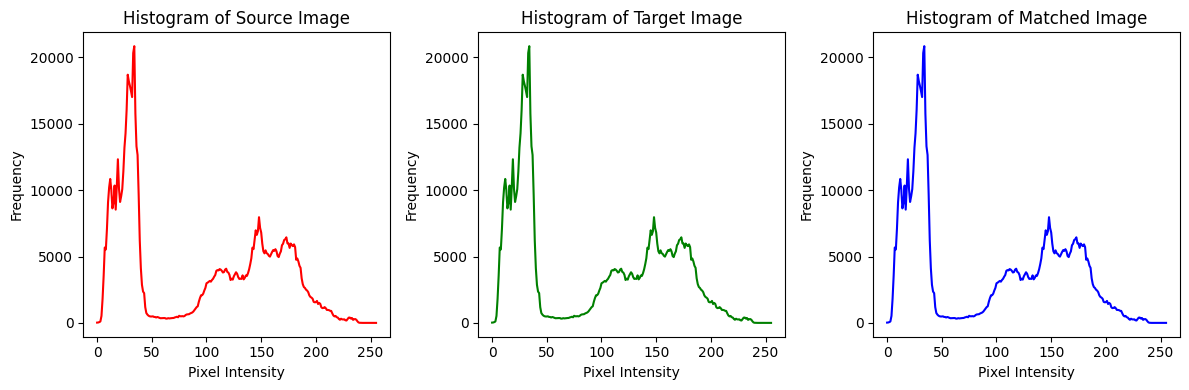

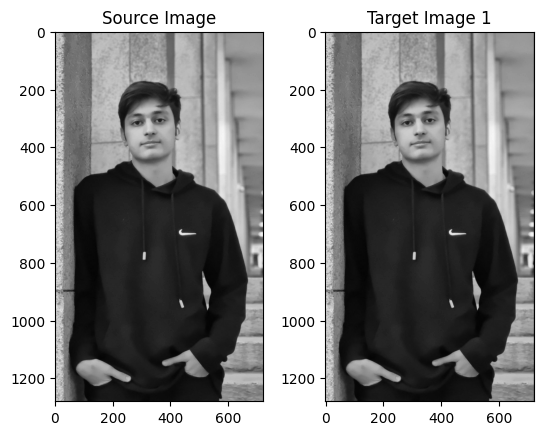

Dissimilarity score for image 1: 0.000
----------------------------------------------------------------------------------------------------------------------------------


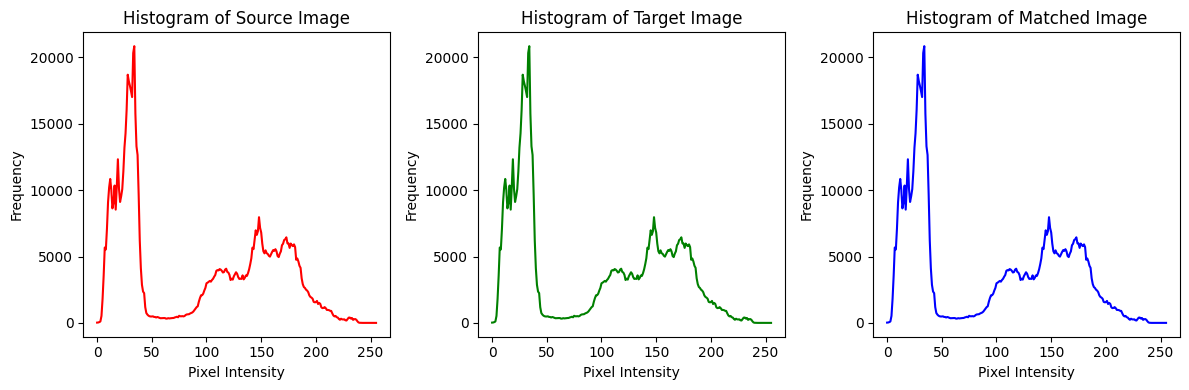

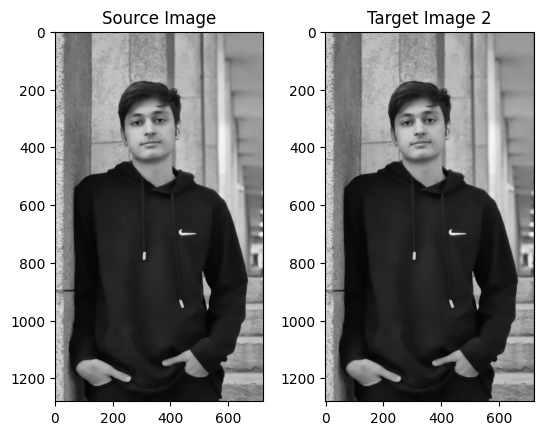

Dissimilarity score for image 2: 0.000
----------------------------------------------------------------------------------------------------------------------------------


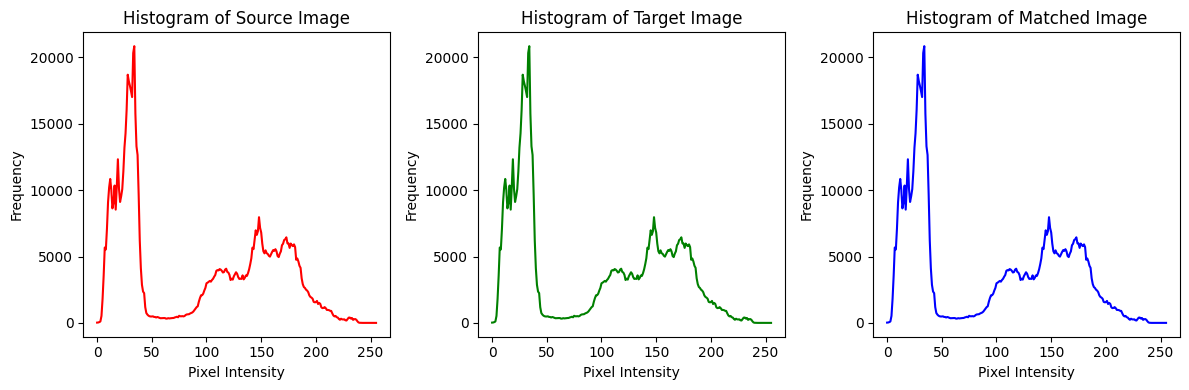

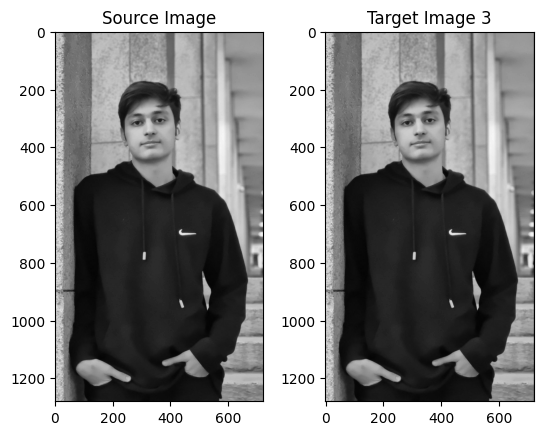

Dissimilarity score for image 3: 0.000
----------------------------------------------------------------------------------------------------------------------------------


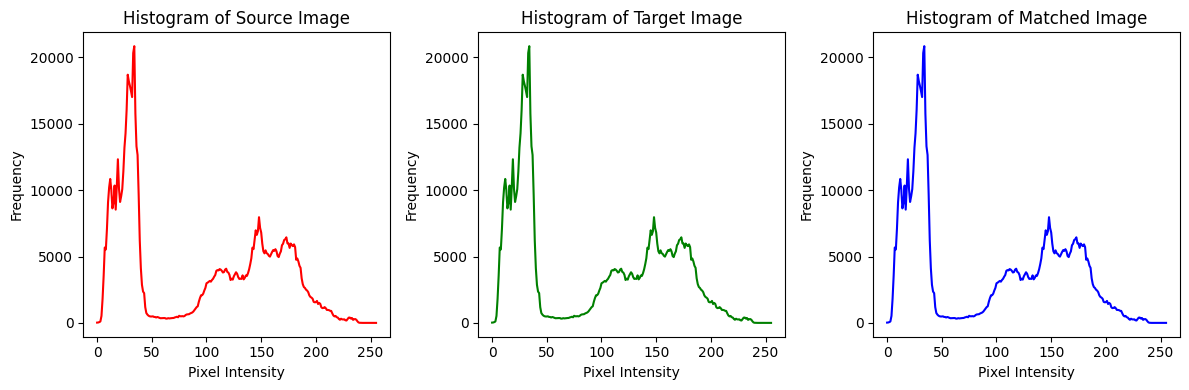

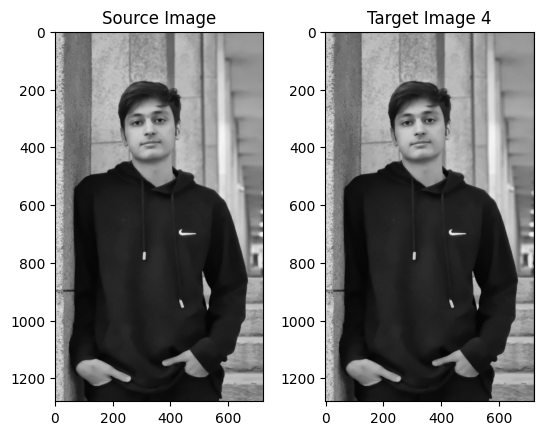

Dissimilarity score for image 4: 0.000
----------------------------------------------------------------------------------------------------------------------------------


In [33]:
def histogram_match(source_img, target_img):
   hist_source, bins_source = np.histogram(source_img.flatten(), 256, [0, 256])
   hist_target, bins_target = np.histogram(target_img.flatten(), 256, [0, 256])

   # Normalize the histograms
   cdf_source = hist_source.cumsum()
   cdf_source = (cdf_source - cdf_source.min()) / (cdf_source.max() - cdf_source.min())
   cdf_target = hist_target.cumsum()
   cdf_target = (cdf_target - cdf_target.min()) / (cdf_target.max() - cdf_target.min())

   # Create the lookup table for histogram matching
   lookup_table = np.interp(cdf_source, cdf_target, np.linspace(0, 255, 256))

   # Apply the histogram matching to the first image
   matched = np.clip(np.uint8(lookup_table[source_img]), 0, 255)
   dissimilarity_score = np.sum(np.abs(cdf_source - cdf_target))

   return matched, hist_source, hist_target, np.histogram(matched.flatten(), 256, [0, 256])[0], dissimilarity_score

def plot_histograms(hist_source, hist_target, hist_matched):
   plt.figure(figsize=(12, 4))
   plt.subplot(1, 3, 1)
   plt.plot(hist_source, color='r')
   plt.title('Histogram of Source Image')
   plt.xlabel('Pixel Intensity')
   plt.ylabel('Frequency')

   plt.subplot(1, 3, 2)
   plt.plot(hist_target, color='g')
   plt.title('Histogram of Target Image')
   plt.xlabel('Pixel Intensity')
   plt.ylabel('Frequency')

   plt.subplot(1, 3, 3)
   plt.plot(hist_matched, color='b')
   plt.title('Histogram of Matched Image')
   plt.xlabel('Pixel Intensity')
   plt.ylabel('Frequency')

   plt.tight_layout()
   plt.show()

for image_index in range(1, 5):
   image1 = cv2.imread(f'{FACE_IMAGES_PATH}1.jpg')
   image2 = cv2.imread(f'{FACE_IMAGES_PATH}{image_index}.jpg')

   # Convert images to grayscale
   gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
   gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

   # Perform histogram matching
   matched_image, hist1, hist2, matched_hist, dissimilarity_score = histogram_match(gray1, gray2)


   # Plot histograms in one plot
   plot_histograms(hist1, hist2, matched_hist)

   # Display images
   plt.figure()
   plt.subplot(1, 2, 1)
   plt.title('Source Image')
   plt.imshow(gray1, cmap='gray')

   plt.subplot(1, 2, 2)
   plt.title(f'Target Image {image_index}')
   plt.imshow(gray2, cmap='gray')
   plt.show()

   print(f'Dissimilarity score for image {image_index}: {dissimilarity_score:0.3f}')
   print(130 * '-')

# Part 5

In [34]:
PART5_PATH = 'Images/'

Plot the histogram of the left hemisphere and the right hemisphere of each image and use the Histogram Matching technique.
and report the presence of a brain lesion by setting an appropriate threshold value for dissimilarity.

Dissimilarity score for image 1: 6.014


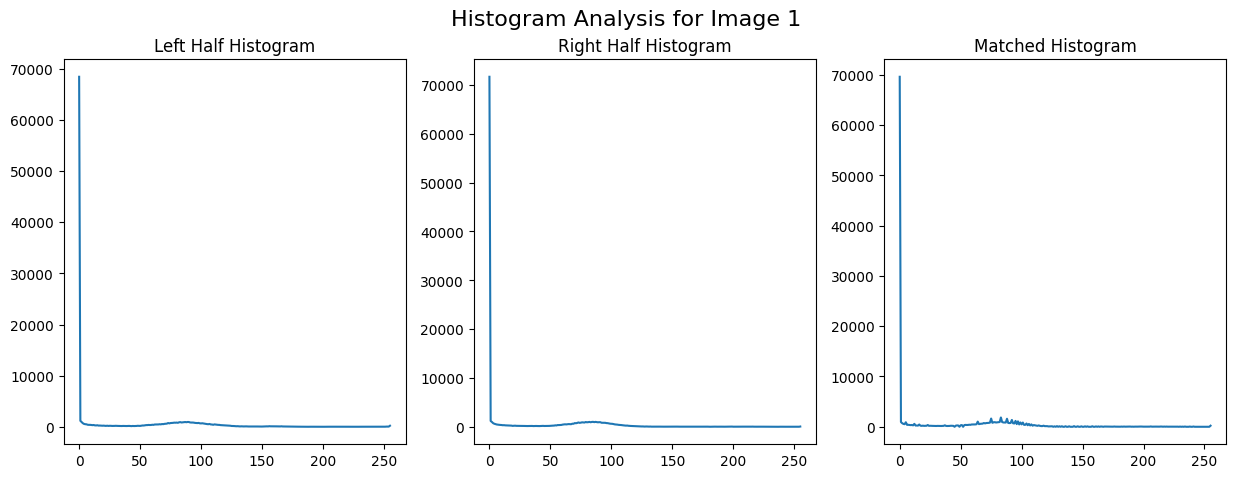

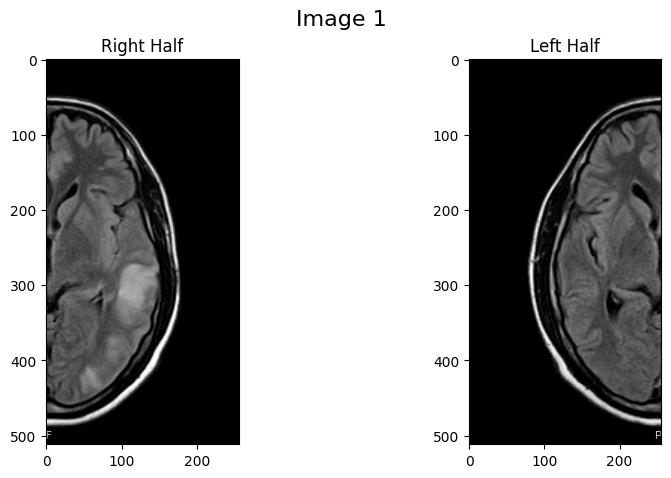

----------------------------------------------------------------------------------------------------------------------------------
Dissimilarity score for image 2: 6.543
Potential abnormality detected


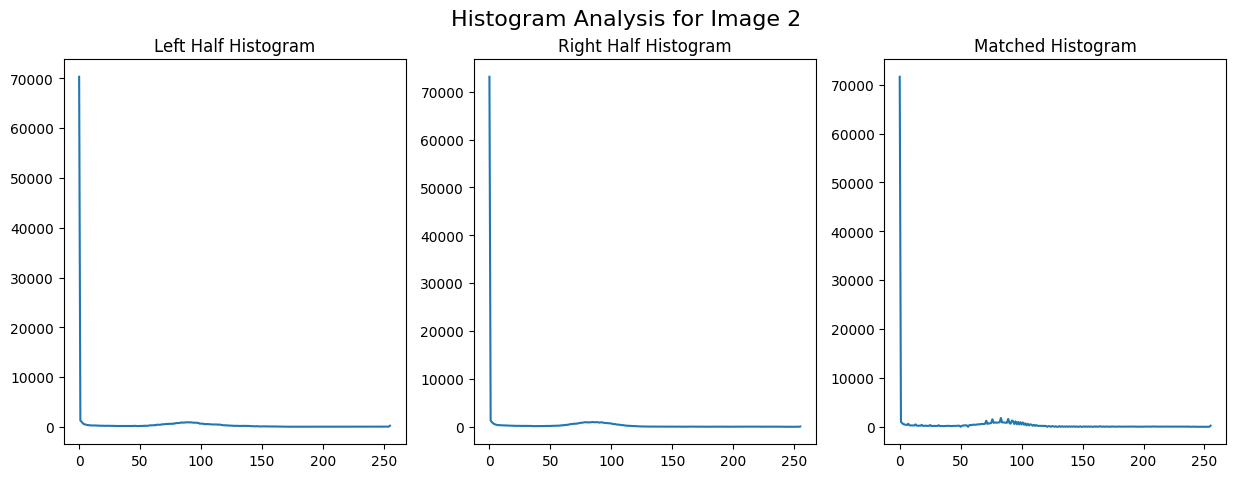

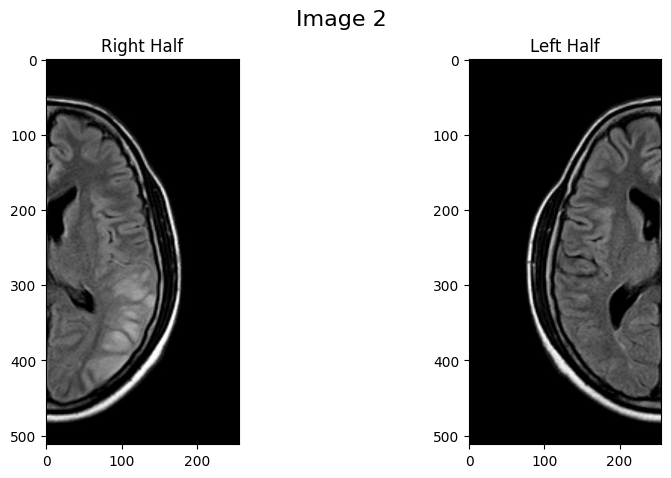

----------------------------------------------------------------------------------------------------------------------------------
Dissimilarity score for image 3: 5.907


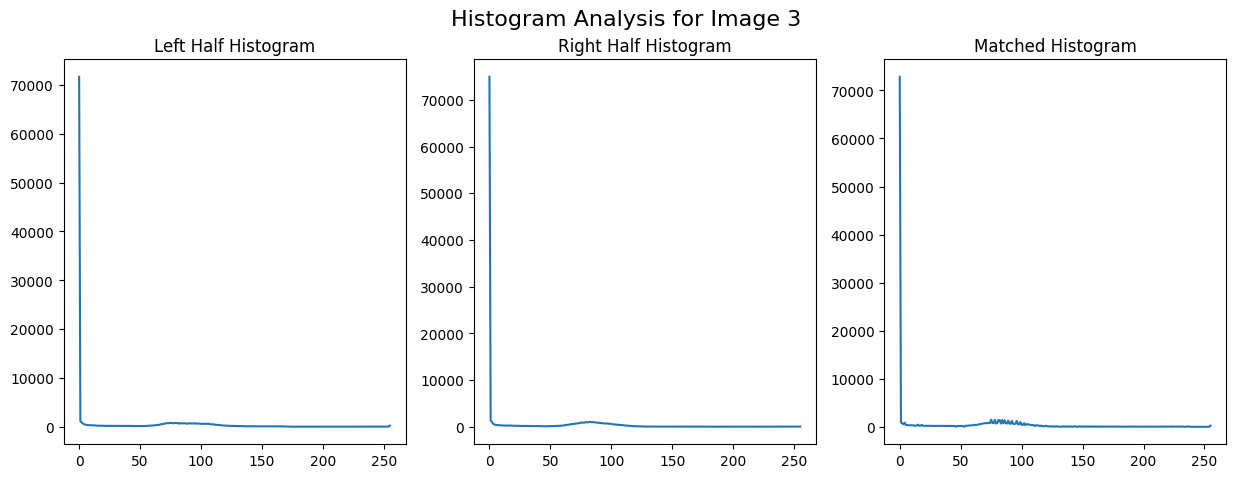

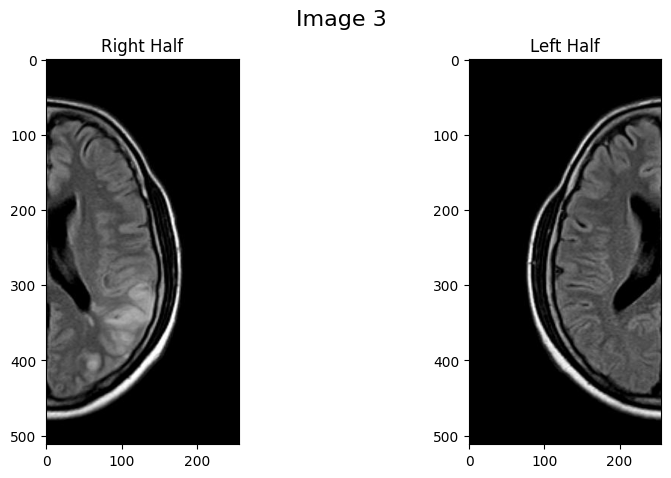

----------------------------------------------------------------------------------------------------------------------------------
Dissimilarity score for image 4: 5.462


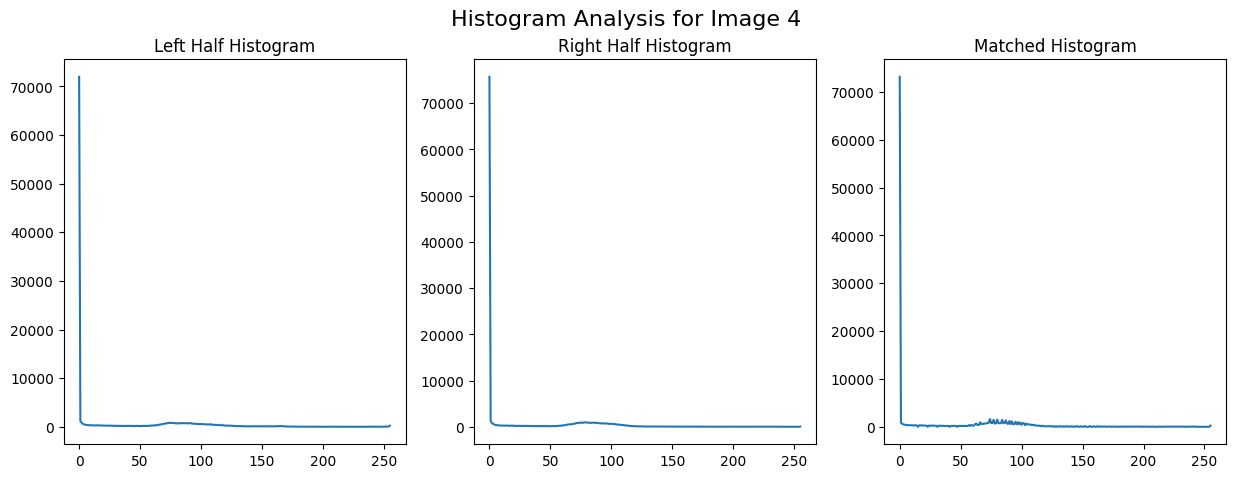

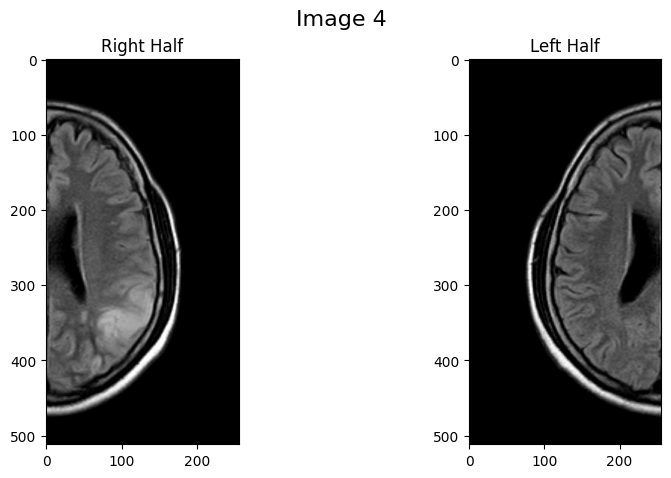

----------------------------------------------------------------------------------------------------------------------------------
Dissimilarity score for image 5: 6.533
Potential abnormality detected


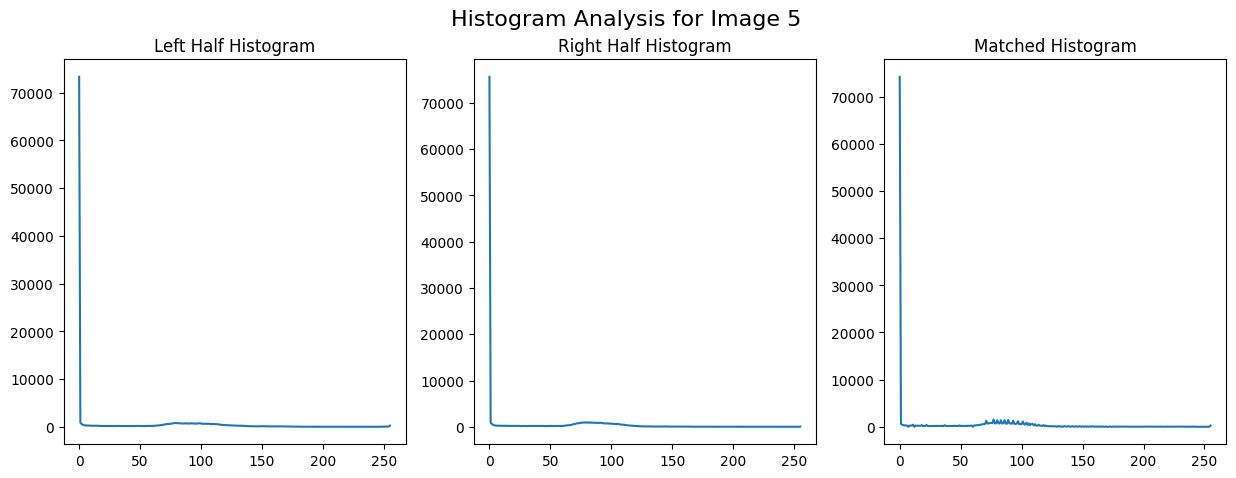

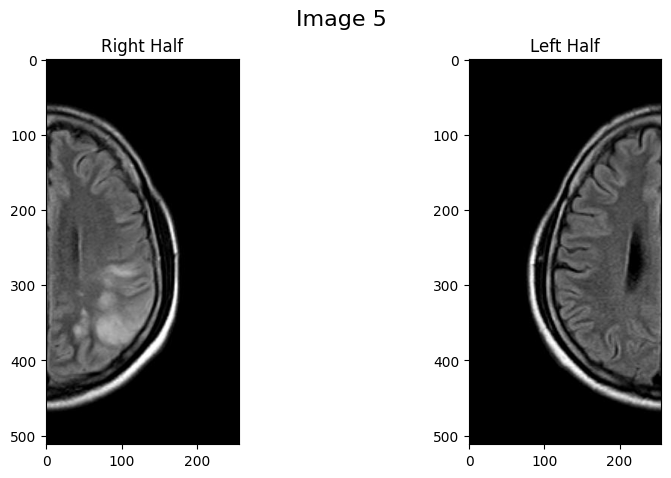

----------------------------------------------------------------------------------------------------------------------------------
Dissimilarity score for image 6: 8.276
Potential abnormality detected


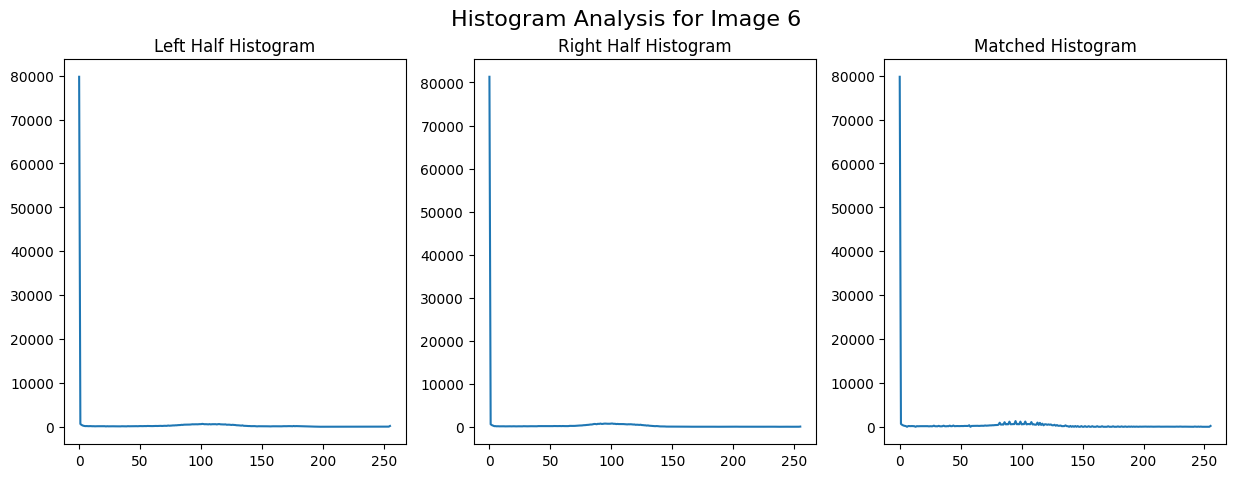

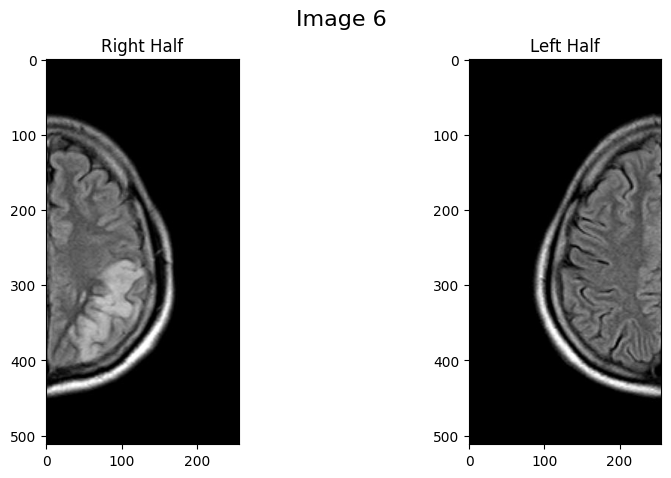

----------------------------------------------------------------------------------------------------------------------------------
Dissimilarity score for image 7: 8.537
Potential abnormality detected


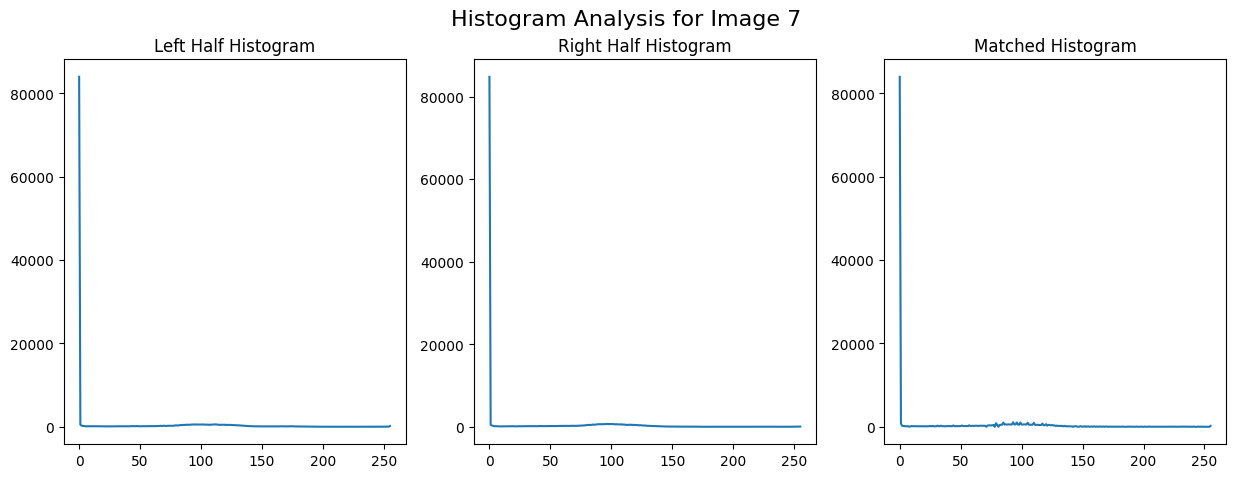

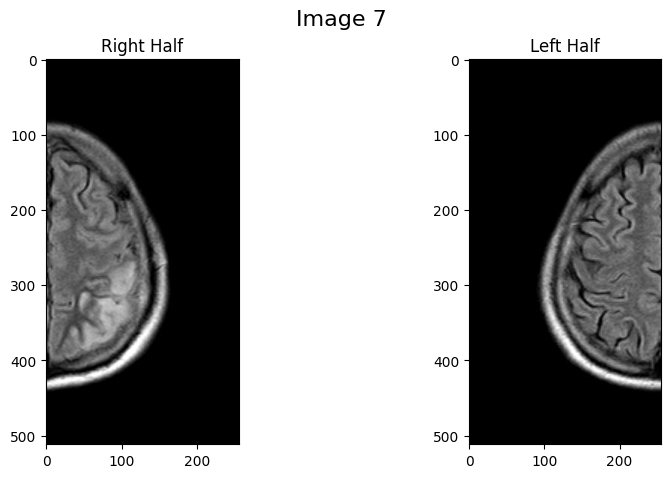

----------------------------------------------------------------------------------------------------------------------------------
Dissimilarity score for image 8: 5.042


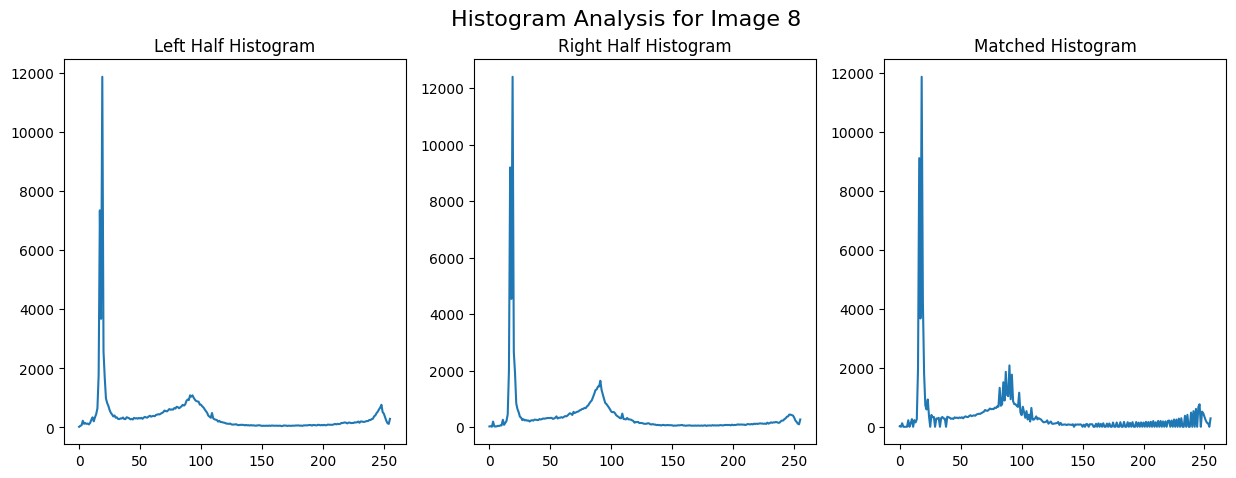

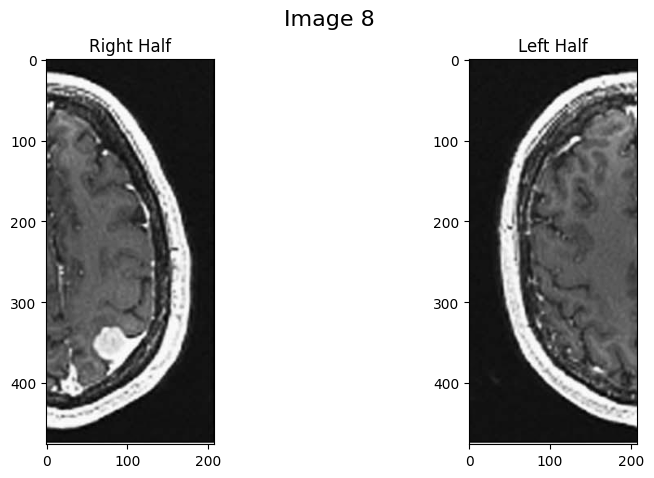

----------------------------------------------------------------------------------------------------------------------------------


In [35]:
DISSIMILARITY_THRESHOLD = 6.1

for image_number in range(1, 9):
    if image_number == 8:
        mri_image = cv2.imread(PART5_PATH + f'{image_number}.jpg', cv2.IMREAD_GRAYSCALE)
    else:
        mri_image = cv2.imread(PART5_PATH + f'{image_number}.jpeg', cv2.IMREAD_GRAYSCALE)

    mid_point = mri_image.shape[1] // 2
    left_half = mri_image[:, :mid_point]
    right_half = mri_image[:, mid_point:]

    # Perform histogram matching
    matched_image, hist1, hist2, matched_hist, dissimilarity_score = histogram_match(right_half, left_half)

    print(f'Dissimilarity score for image {image_number}: {dissimilarity_score:0.3f}')

    if dissimilarity_score > DISSIMILARITY_THRESHOLD:
        print('Potential abnormality detected')

    # Plot histograms
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(hist1)
    axs[0].set_title('Left Half Histogram')
    axs[1].plot(hist2)
    axs[1].set_title('Right Half Histogram')
    axs[2].plot(matched_hist)
    axs[2].set_title('Matched Histogram')
    plt.suptitle(f'Histogram Analysis for Image {image_number}', fontsize=16)
    plt.show()

    # Display images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(right_half, cmap='gray')
    axs[0].set_title(f'Right Half')
    axs[1].imshow(left_half, cmap='gray')
    axs[1].set_title(f'Left Half')
    plt.suptitle(f'Image {image_number}', fontsize=16)
    plt.show()

    print(130 * '-')

With the help of a suitable algorithm (search the net), identify the location of the lesion (briefly explain about the desired algorithm).

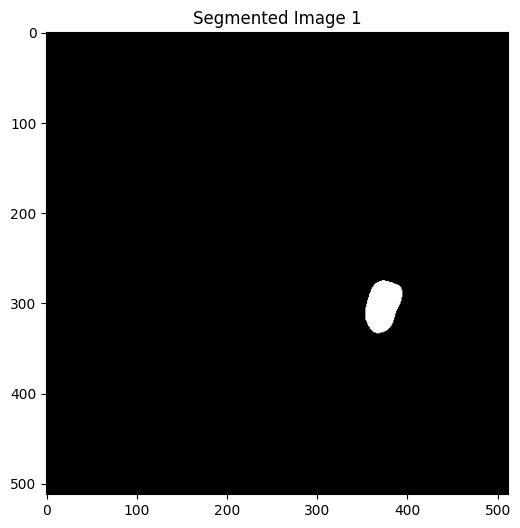

----------------------------------------------------------------------------------------------------------------------------------


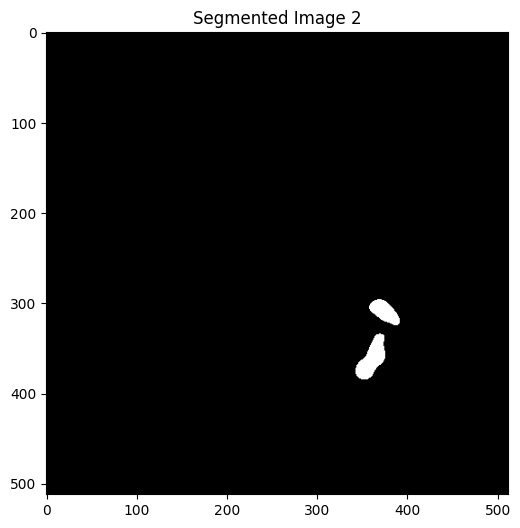

----------------------------------------------------------------------------------------------------------------------------------


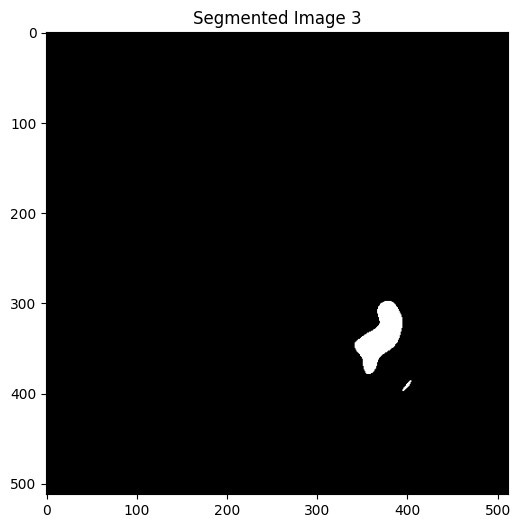

----------------------------------------------------------------------------------------------------------------------------------


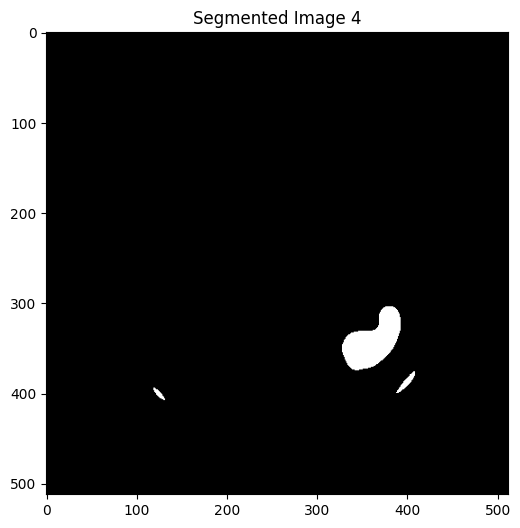

----------------------------------------------------------------------------------------------------------------------------------


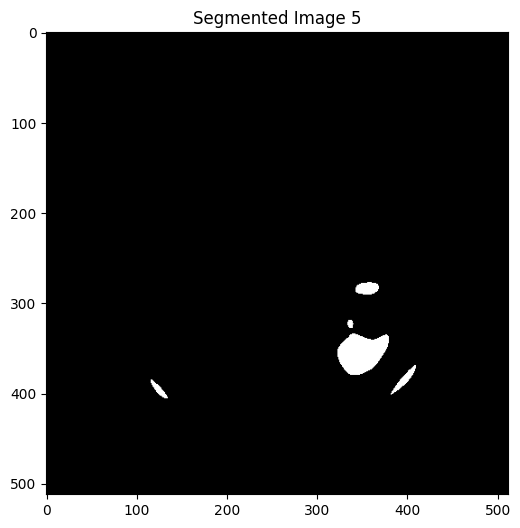

----------------------------------------------------------------------------------------------------------------------------------


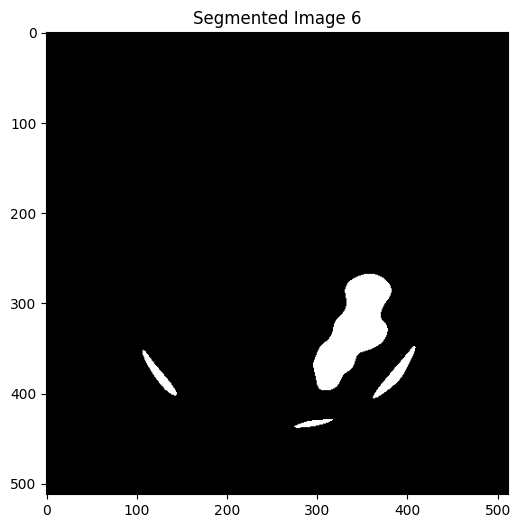

----------------------------------------------------------------------------------------------------------------------------------


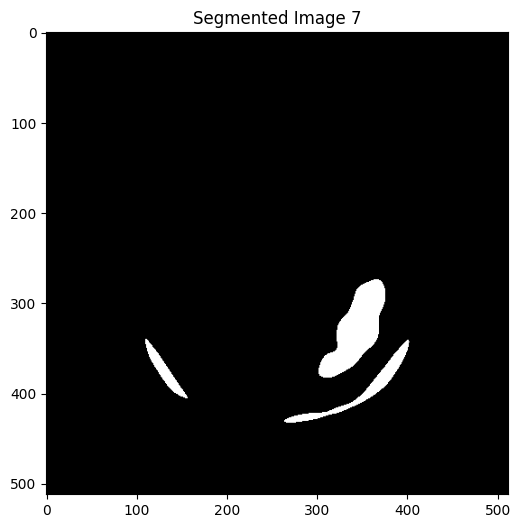

----------------------------------------------------------------------------------------------------------------------------------


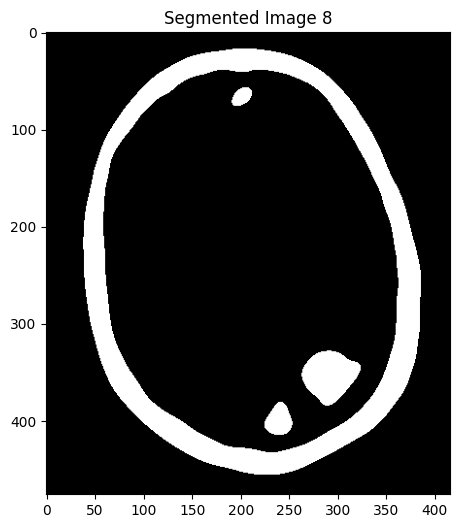

----------------------------------------------------------------------------------------------------------------------------------


In [36]:
def segmentation(image):
    blurred_image = cv2.GaussianBlur(image, (45, 45), 0)
    _, thresholded = cv2.threshold(blurred_image, 130, 255, cv2.THRESH_BINARY)
    return thresholded

# Load the MRI image
for image_number in range(1, 9):
    if image_number == 8:
        mri_image = cv2.imread(PART5_PATH + f'{image_number}.jpg', cv2.IMREAD_GRAYSCALE)
    else:
        mri_image = cv2.imread(PART5_PATH + f'{image_number}.jpeg', cv2.IMREAD_GRAYSCALE)

    # Detect the tumor region
    tumor_detected_image = segmentation(mri_image)

    # Display the result
    plt.figure(figsize=(8, 6))
    plt.imshow(tumor_detected_image, cmap='gray')
    plt.title(f'Segmented Image {image_number}')
    plt.show()

    print(130 * '-')


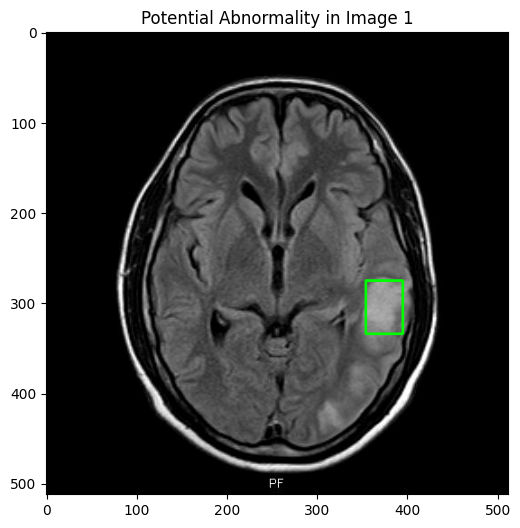

----------------------------------------------------------------------------------------------------------------------------------


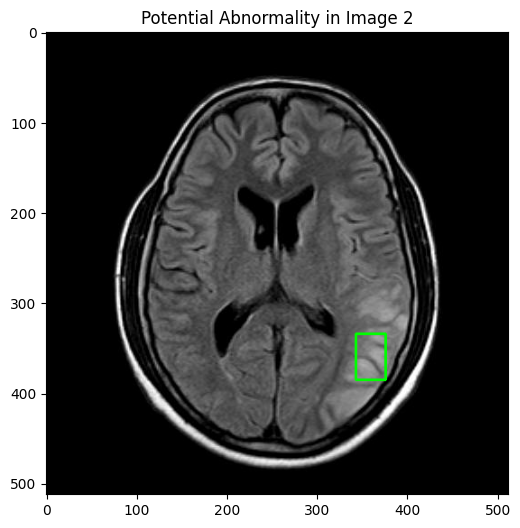

----------------------------------------------------------------------------------------------------------------------------------


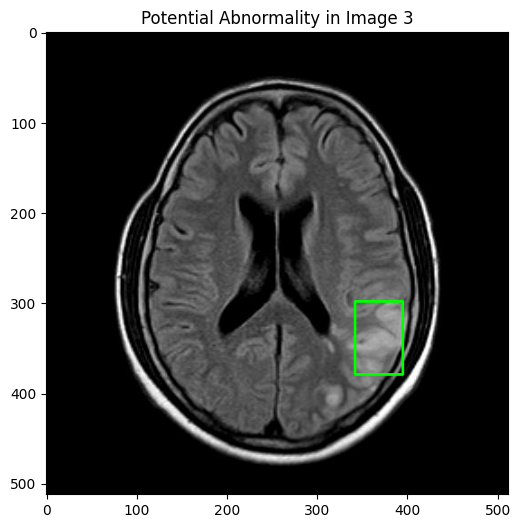

----------------------------------------------------------------------------------------------------------------------------------


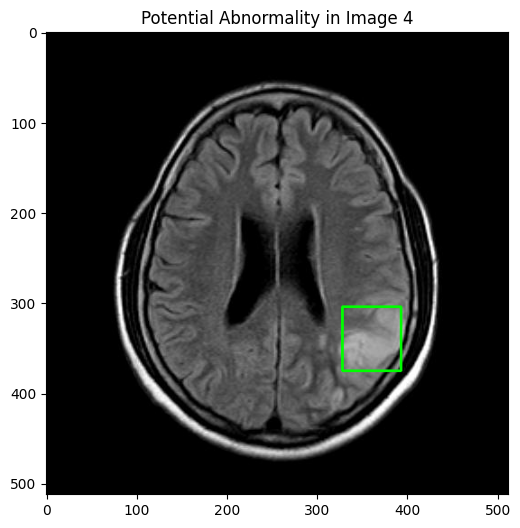

----------------------------------------------------------------------------------------------------------------------------------


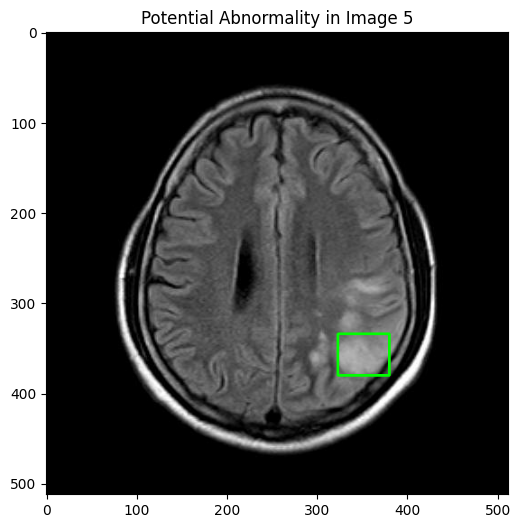

----------------------------------------------------------------------------------------------------------------------------------


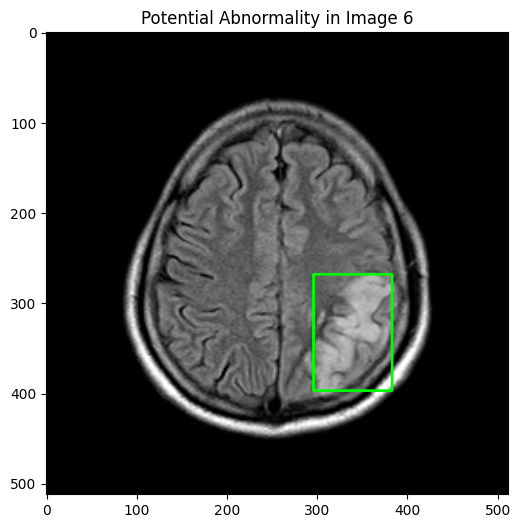

----------------------------------------------------------------------------------------------------------------------------------


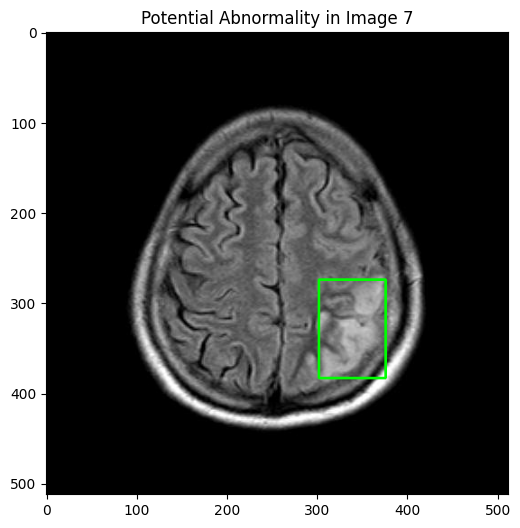

----------------------------------------------------------------------------------------------------------------------------------


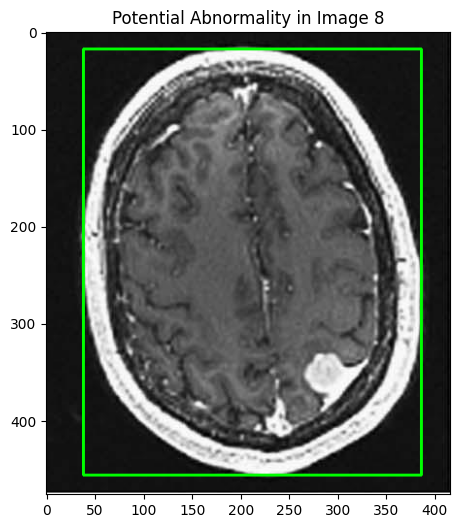

----------------------------------------------------------------------------------------------------------------------------------


In [37]:

def detect_abnormality(mri_image):
    gray = cv2.cvtColor(mri_image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray, (45, 45), 0)
    _, abnormality_mask = cv2.threshold(blurred_image, 130, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(abnormality_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        abnormality_region = mri_image.copy()
        cv2.rectangle(abnormality_region, (x, y), (x + w, y + h), (0, 255, 0), 2)
        return abnormality_region
    else:
        return mri_image

for image_number in range(1, 9):
    if image_number == 8:
        mri_image = cv2.imread(PART5_PATH + f'{image_number}.jpg', cv2.IMREAD_COLOR)
    else:
        mri_image = cv2.imread(PART5_PATH + f'{image_number}.jpeg', cv2.IMREAD_COLOR)

    # Detect the abnormality region
    abnormality_detected_image = detect_abnormality(mri_image)

    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(abnormality_detected_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Potential Abnormality in Image {image_number}')
    plt.show()

    print(130 * '-')